In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
import os

path = os.getcwd()
#path = "C:/Users/ari_r/OneDrive - Universidad de los Andes/Documentos/MOPTA-23/Data/"
#path = '/Users/juanbeta/My Drive/Research/MOPTA/MOPTA-23/Data/'

vehicles = pd.read_csv(path+'/Data/MOPTA2023_car_locations.csv', sep = ',', header = None)
vehicles = vehicles.append([vehicles]*9,ignore_index=True)

stations = pd.read_csv(path+"/Data/fuel_stations.csv")

northern = (-79.761960, 42.269385)
southern = (-76.9909,39.7198)
western = (-80.519400, 40.639400)
eastern = (-74.689603, 41.363559)

stations_loc = stations[["Longitude","Latitude"]]
stations_loc["Latitude"] = (stations["Latitude"]-southern[1])*69-7
stations_loc["Longitude"] = (stations["Longitude"]-western[0])*52-1

stations = stations_loc[(stations_loc["Longitude"] <= 290) & (stations_loc["Latitude"] <= 150) & (stations_loc["Latitude"] >= 0) & (stations_loc["Longitude"] >= 0)]
stations.rename(columns={"Longitude": 0, "Latitude":1}, inplace=True)

stations.index = np.arange(1, len(stations) + 1)
vehicles.index = np.arange(1, len(vehicles) + 1)


C:\Users\ari_r\AppData\Local\Temp\ipykernel_39580\4111799760.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vehicles = vehicles.append([vehicles]*9,ignore_index=True)
C:\Users\ari_r\AppData\Local\Temp\ipykernel_39580\4111799760.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_loc["Latitude"] = (stations["Latitude"]-southern[1])*69-7
C:\Users\ari_r\AppData\Local\Temp\ipykernel_39580\4111799760.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [2]:
'''for sc in range(25):
    #vehics = [sum([l*i in K[sc] for i in range(1,11)]) for l in locations.index]
    vehics = [sum(k%1079+1 == l for k in K[sc]) for l in locations.index]
    locations[f"going {sc}"] = vehics
locations.to_csv(path+f"Definite Locations.csv")'''

stations = pd.read_csv(path+"/Data/Definite Stations.csv",index_col=[0])
vehicles = pd.read_csv(path+"/Data/Definite Vehicles.csv",index_col=[0])
locations = pd.read_csv(path+"/Data/Definite Locations.csv",index_col=[0])

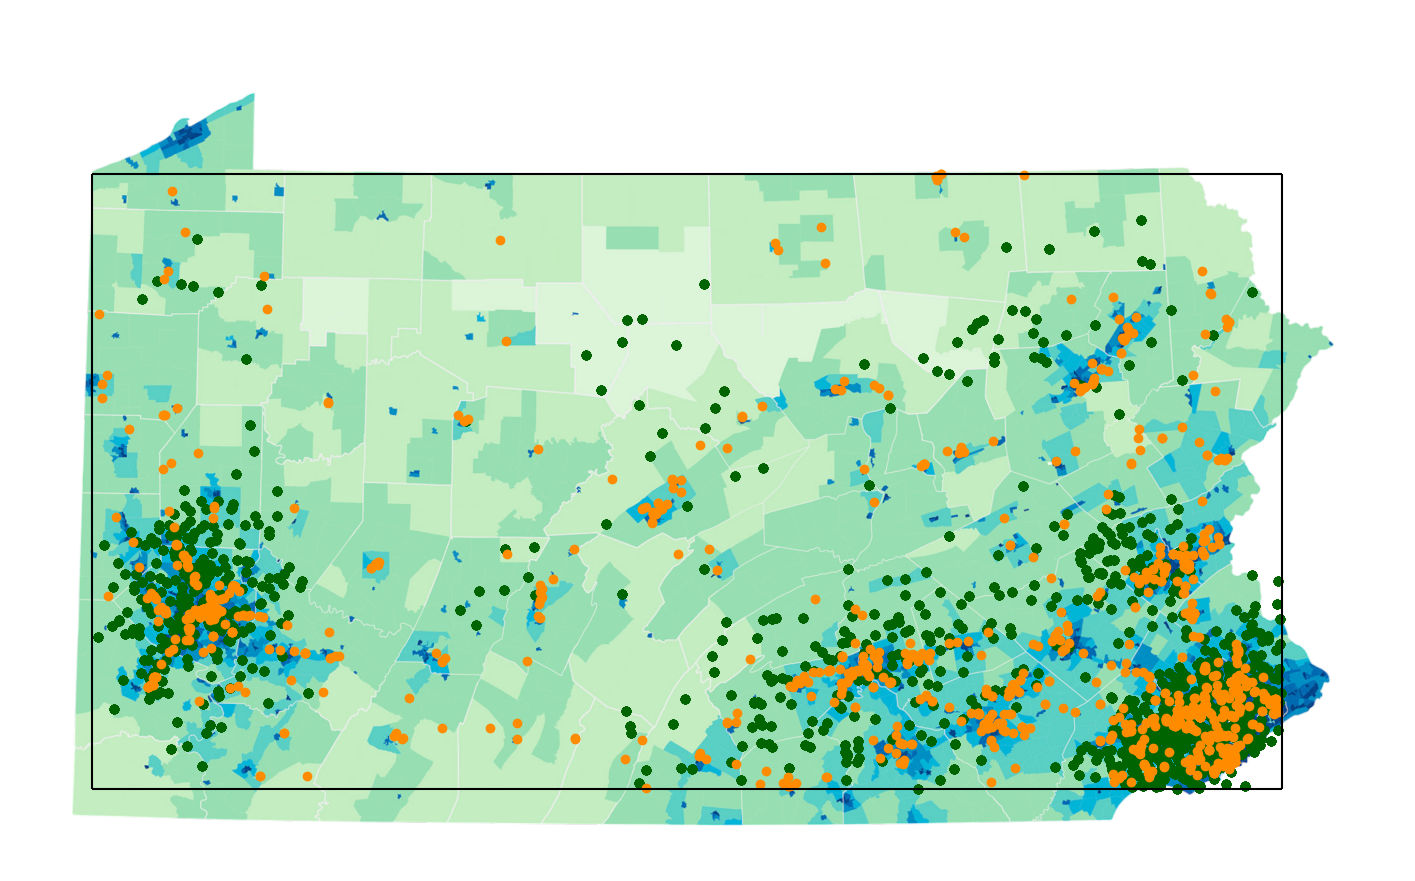

In [11]:
img = plt.imread("./Problem Visualization/Pennsylvania_Population.png")
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(18,12))


for v in vehicles.index:
        x_v = vehicles.loc[v,"0"]; y_v = vehicles.loc[v,"1"]
        ax.plot(x_v,y_v,marker="o",color="darkgreen")

oor = 0
for v in stations.index:
        x_v = stations.loc[v,"0"]; y_v = stations.loc[v,"1"]
        if x_v > 290 or y_v > 150 or x_v < 0 or y_v < 0: col= "magenta"; oor += 1
        else: col = "darkorange"
        ax.plot(x_v,y_v,marker="o",color=col)

ax.vlines(x=[0,290],ymin=0,ymax=150,color="black")
ax.hlines(y=[0,150],xmin=0,xmax=290,color="black")

ax.spines[["top","bottom","left","right"]].set_visible(False)

zero = (-5,-12)
height = 184.425
#ax.vlines(x=[zero[0]+height*5/3],ymin=0,ymax=150)
ax.imshow(img, extent=[zero[0], zero[0]+height*5/3, zero[1], zero[1]+height])
#ax.legend(loc="upper right")
ax.set_xlim(-20,320)
ax.set_ylim(-20,190)
ax.set_xticks([]); ax.set_yticks([])
#ax.set_title("Charging Stations and Vehicles locations")

plt.savefig("./Problem Visualization/Vehicles+Stations map.png",dpi=300,transparent=True)

In [42]:
stations.to_csv(path+"Definite Stations.csv")
vehicles.to_csv(path+"Definite Vehicles.csv")